# TP Integrador Análisis de datos

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.
Trabajaremos con un dataset de Kaggle con datos de por distintas estaciones metereológicas de
Australia.

El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos
metereológicos del día actual.

1.1 Descargar el dataset de kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Visualizar las primeras filas.

In [4]:
# Load csv 
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Realizar un resumen de 5 números.

In [5]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo
y si es informativa para un problema de clasificación (por ejemplo si se trata de un código,
como una matrícula, o un nombre propio).

In [7]:
weather.describe
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Identificar las variables de entrada y de salida del problema:

* Variables de entrada: 
* Variables de salida:

In [8]:
Y = weather["RainTomorrow"].to_frame().copy()
X = weather.drop(["RainTomorrow"], axis=1).copy()

print("Y values: ", Y.head())
print("X values: ", X.head())


Y values:    RainTomorrow
0           No
1           No
2           No
3           No
4           No
X values:           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0           W           44.0          W  ...         24.0         71.0   
1         WNW           44.0        NNW  ...         22.0         44.0   
2         WSW           46.0          W  ...         26.0         38.0   
3          NE           24.0         SE  ...          9.0         45.0   
4           W           41.0        ENE  ...         20

• Variables de entrada:

– Realizar los siguientes análisis por tipo de variable.

∗ Numéricas:

· Obtener conclusiones acerca de la distribución de los datos.
}
∗ Categóricas

· Obtener conclusiones acerca de cardinalidad, representación de cada categoría,
etc.

∗ Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?

In [9]:
print("Unique values X:")
print(X.nunique(dropna=False))

print("\nUnique values Y:")
print(Y.nunique(dropna=False))


Unique values X:
Date             3436
Location           49
MinTemp           390
MaxTemp           506
Rainfall          682
Evaporation       359
Sunshine          146
WindGustDir        17
WindGustSpeed      68
WindDir9am         17
WindDir3pm         17
WindSpeed9am       44
WindSpeed3pm       45
Humidity9am       102
Humidity3pm       102
Pressure9am       547
Pressure3pm       550
Cloud9am           11
Cloud3pm           11
Temp9am           442
Temp3pm           503
RainToday           3
dtype: int64

Unique values Y:
RainTomorrow    3
dtype: int64


In [10]:
X_categorical = X.select_dtypes(include=["object"]).copy()
print(X_categorical.dtypes)
print("Unique values")
print(X_categorical.nunique(dropna=False))

Date           object
Location       object
WindGustDir    object
WindDir9am     object
WindDir3pm     object
RainToday      object
dtype: object
Unique values
Date           3436
Location         49
WindGustDir      17
WindDir9am       17
WindDir3pm       17
RainToday         3
dtype: int64


In [86]:
def display_dataset_categorical(dataset):
    fig, ax = plt.subplots(1, len(dataset.columns), figsize=(20,10))
    for i, categorical_feature in enumerate(dataset):
        dataset[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
    fig.show()

<ipython-input-86-8d22e7d7f509>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


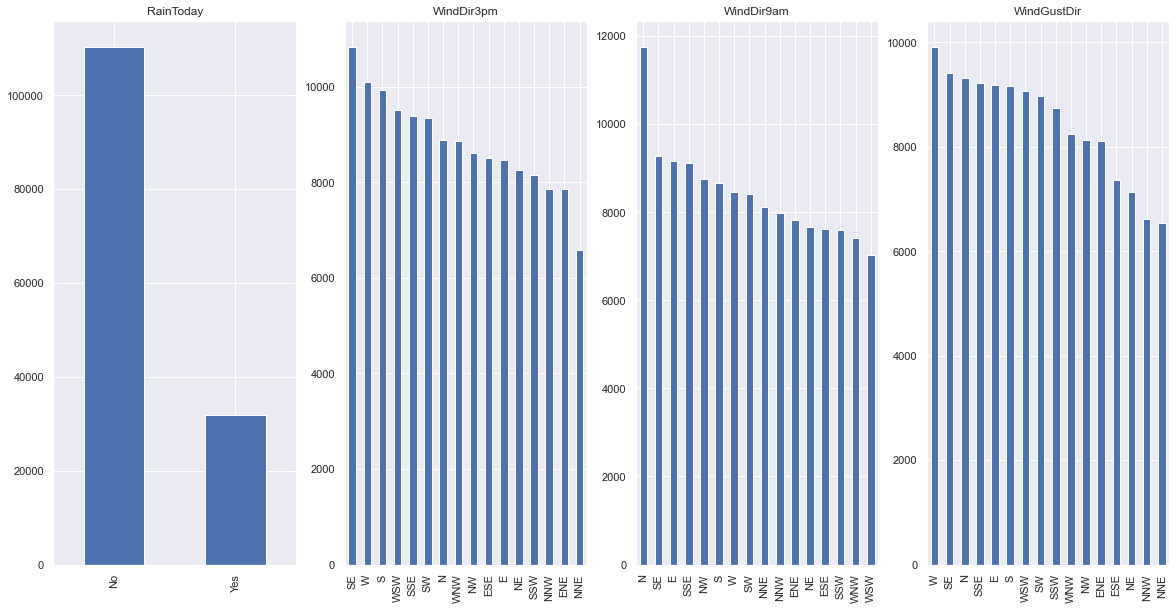

In [87]:
cols = ['RainToday', "WindDir3pm", "WindDir9am", "WindGustDir"]
display_dataset_categorical(X_categorical[cols])

<AxesSubplot:>

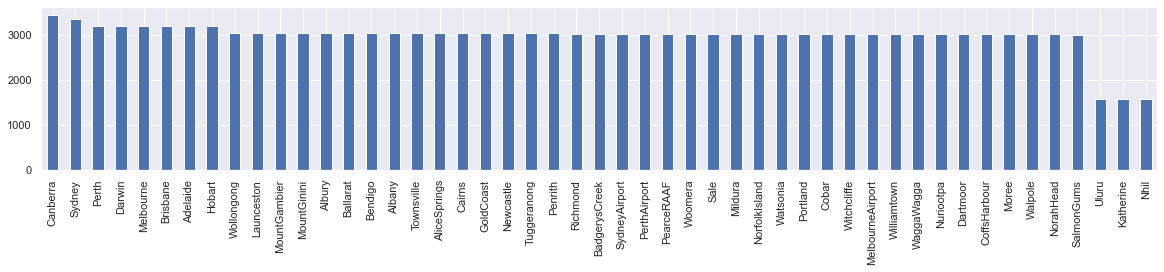

In [94]:
X_categorical["Location"].value_counts().plot(kind="bar", figsize=(20,3))


In [68]:
X_numerical = X.select_dtypes(include=["float64"]).copy()
X_numerical.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
dtype: object

In [72]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

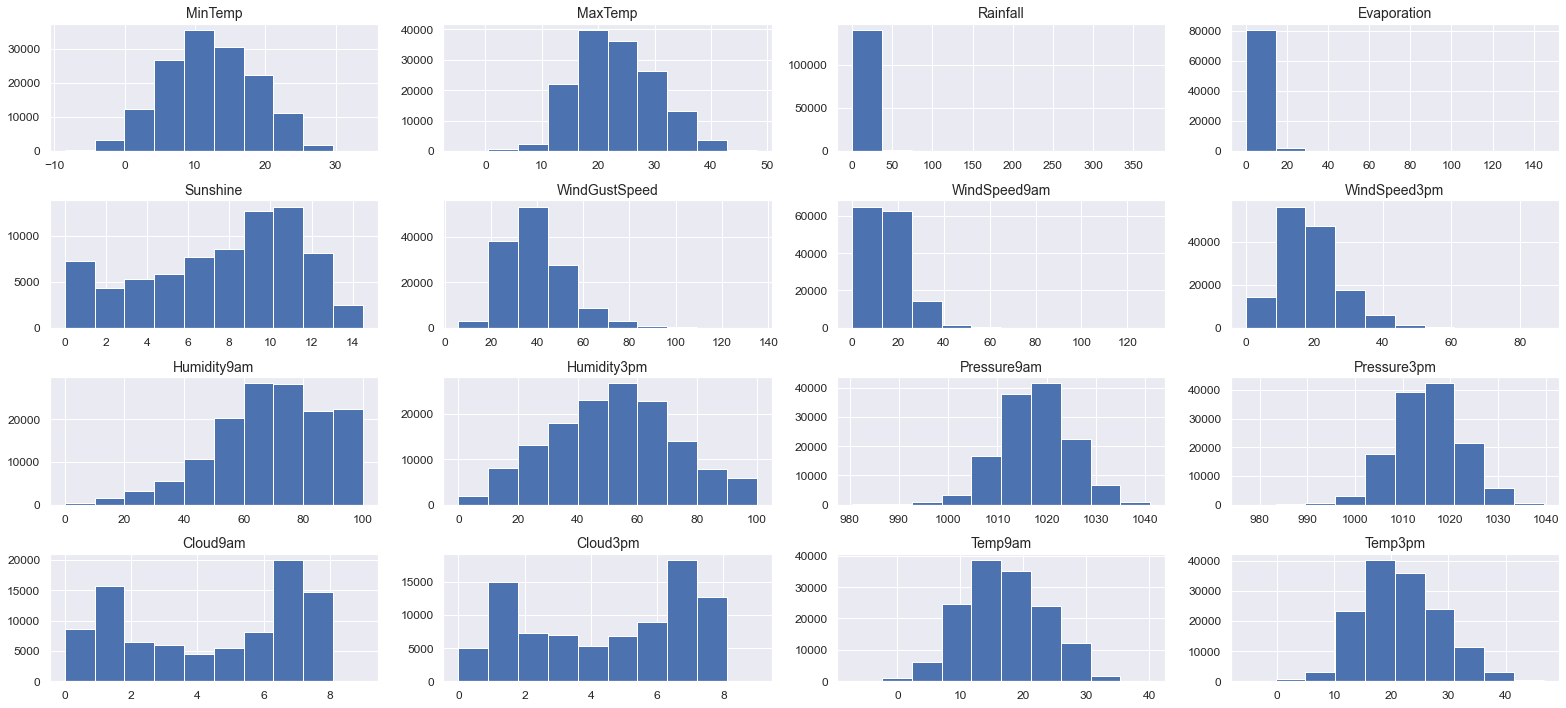

In [75]:
display_dataset_distributions(X_numerical)

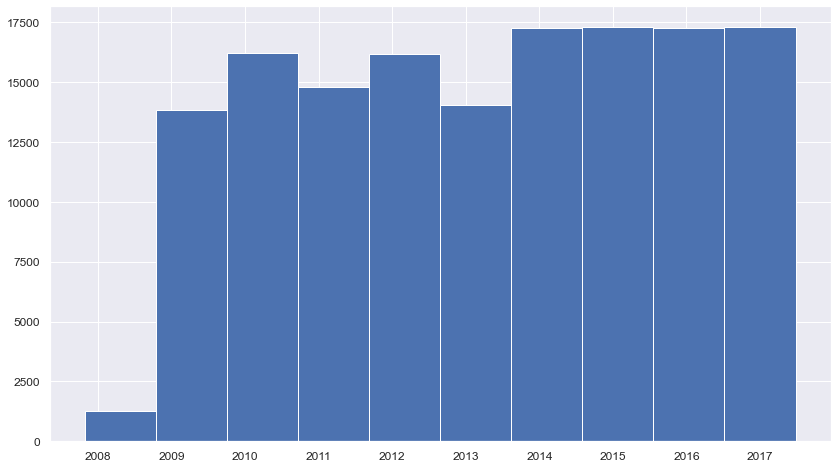

In [99]:
fig = pd.to_datetime(X_categorical["Date"]).hist(xlabelsize=12, ylabelsize=12,figsize=(14,8))